In [1]:
import tweetclassifier as tc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import datetime
from time import time

%matplotlib inline
warnings.filterwarnings('ignore')

pd.set_option('display.max_info_columns',200)
pd.set_option('display.max_colwidth',200)
pd.set_option('display.max_rows', 100)
plt.style.use('ggplot')

In [4]:
from sklearn.ensemble import ExtraTreesRegressor

In [73]:
model = ExtraTreesRegressor(min_samples_split=40, max_depth=8)

In [15]:
df = pd.read_csv('../../sampled_scaled_outrage.csv', index_col='Unnamed: 0', header=0).reset_index(drop=True)

In [74]:
model.fit(df[['log_followers', 'outrage_index']][:40000], df['log_retweets'][:40000])

ExtraTreesRegressor(bootstrap=False, criterion='mse', max_depth=8,
          max_features='auto', max_leaf_nodes=None,
          min_impurity_decrease=0.0, min_impurity_split=None,
          min_samples_leaf=1, min_samples_split=40,
          min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
          oob_score=False, random_state=None, verbose=0, warm_start=False)

In [75]:
model.score(df[['log_followers', 'outrage_index']][40000:], df['log_retweets'][40000:])

0.090191233925993583

In [76]:
model.feature_importances_

array([ 0.88250888,  0.11749112])

In [77]:
from scipy.stats.stats import pearsonr

In [81]:
print str(pearsonr(df['log_followers']*df['outrage_index'], df['log_retweets'])) + ' interaction'
print str(pearsonr(df['log_followers'], df['log_retweets'])) + ' followers'
print str(pearsonr(df['outrage_index'], df['log_retweets'])) + ' outrage'

(0.24036941041862658, 0.0) interaction
(0.23192799318285443, 0.0) followers
(0.046685804926693136, 4.5000956901596193e-28) outrage


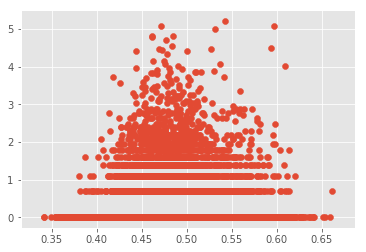

In [88]:
plt.scatter(df['outrage_index'], df['log_retweets'])

In [91]:
pearsonr(df['outrage_index'], df['log_retweets'])

(0.046685804926693136, 4.5000956901596193e-28)

In [92]:
pearsonr(df[df['log_retweets']>1.5]['outrage_index'], df[df['log_retweets']>1.5]['log_retweets'])

(0.020294059881721161, 0.57517538357199494)

In [93]:
pearsonr(df[df['log_retweets']>1.5]['log_followers']*df[df['log_retweets']>1.5]['outrage_index'], df[df['log_retweets']>1.5]['log_retweets'])

(0.17309875677129272, 1.4628261299128705e-06)